# New York City Taxi Trip Duration 01 - EDA

### ※ 프로젝트 개요
####   
####   
### ● 뉴욕시 의 택시 주행 시간을 예측하는 모델 만들기
### ● 픽업 시간, 지리적 좌표, 승객 수 등의 변수가 포함된 NYC 택시 리무진 위원회에서 만든 데이터를 가공해서 사용

###   
### 목표 : 데이터에 대한 EDA(탐색적 데이터 분석)을 수행
###   
###   

## 1. 데이터 불러오기

In [2]:
import pandas as pd

#### train 데이터

In [3]:
train = pd.read_csv("train.csv", parse_dates = ['pickup_datetime', 'dropoff_datetime'])
print(train.shape)
train.head()

(1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


#### test 데이터

In [4]:
test = pd.read_csv("test.csv", parse_dates = ['pickup_datetime'])
print(test.shape)
test.head()

(625134, 9)


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


#### 제출양식

In [5]:
predictions = pd.read_csv("sample_submission.csv")
print(predictions.shape)
predictions.head()

(625134, 2)


,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


####   
####   

## 2. 데이터 탐색

### 1) 변수 확인

In [7]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [8]:
test.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

#### id - 각 운행의 고유 식별자
#### vendor_id - 여행 기록과 연결된 공급자를 나타내는 코드
#### pickup_datetime - 미터기가 사용 된 날짜와 시간
#### dropoff_datetime - 미터가 분리 된 날짜와 시간
#### passenger_count - 차량에 탑승 한 승객 수 (운전자가 입력 한 값)
#### pickup_longitude - 미터가 사용 된 경도
#### pickup_latitude - 미터가 사용 된 위도
#### dropoff_longitude - 미터가 분리 된 경도
#### dropoff_latitude - 미터가 분리 된 위도
#### store_and_fwd_flag -이 플래그는 자동차가 서버에 연결되어 있지 않아서 출장 기록이 차량 메모리에 보관되었는지 여부를 나타냅니다. - Y = 저장 및 전달; N = 상점 및 전방 여행 불가
#### trip_duration - 여행 기간 (초)

#### 목표는 id별 'trip_duration'
#### ※ test데이터에는 'dropoff_datetime'이 존재하지 않음. 이유는 "dropoff_datetime"이 있으면  'trip_duration'을 구할 수 있기 때문

### 2) factor형 변수 확인

In [9]:
pd.unique(train['vendor_id'])

array([2, 1], dtype=int64)

#### 'vendor_id'는 단 두 가지만 존재한다. 뉴욕시의 택시가 'Green Cabs'과 'Yellow Cabs' 두 가지가 있는 데 이에 대한 정보 같다.  factor형 변수이다. 

In [10]:
pd.unique(train['passenger_count'])

array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8], dtype=int64)

#### 승객수를 '0~9'명으로 표시하고 있다. 보통 택시가 승용차라서 5명 이상 승객은 잘못된 데이터일 수도 있다. 물론 벤 형태의 택시가 있을 수 있다.  factor형 변수

In [11]:
pd.unique(train['pickup_longitude'])

array([-73.98215485, -73.98041534, -73.97902679, ..., -73.84746552,
       -73.89477539, -73.84131622])

In [12]:
pd.unique(train['dropoff_latitude'])

array([40.76560211, 40.73115158, 40.71008682, ..., 40.65151978,
       40.64244461, 40.62860489])

#### 위도(latitude) 경도(longitude)는 당연히 factor형 변수가 아니다.

In [13]:
pd.unique(train['store_and_fwd_flag'])

array(['N', 'Y'], dtype=object)

#### 출장기록 여부는 'Yes'와 'NO'인 factor형 변수이다

### 3) 결측치 확인

In [14]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [15]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

#### 결측치는 보이지 않는다. 이를 missingno 패키지를 활용하여 시각화하여 다시 살펴본다.

In [16]:
import missingno as msno

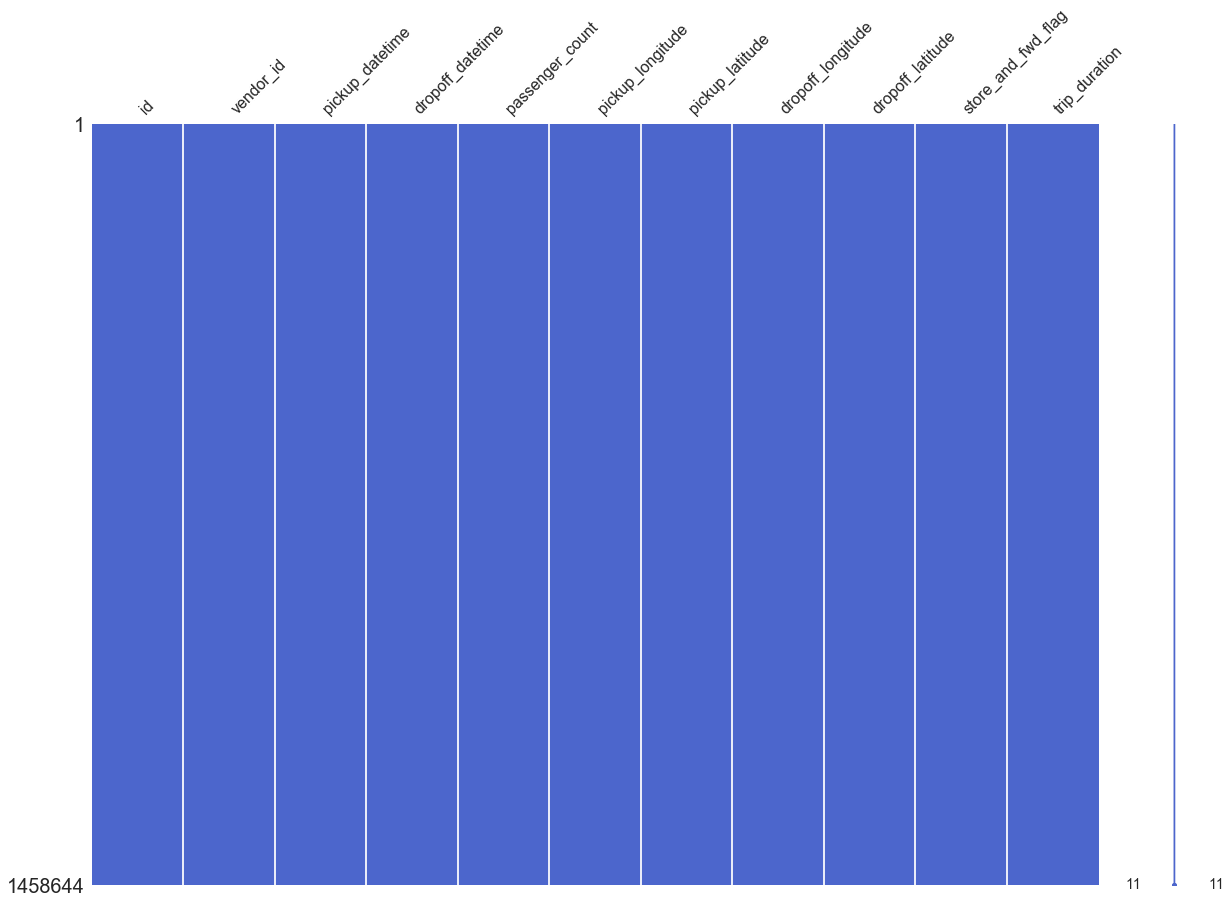

In [20]:
msno.matrix(df = train, figsize = (20, 14), color = (0.3, 0.4, 0.8))

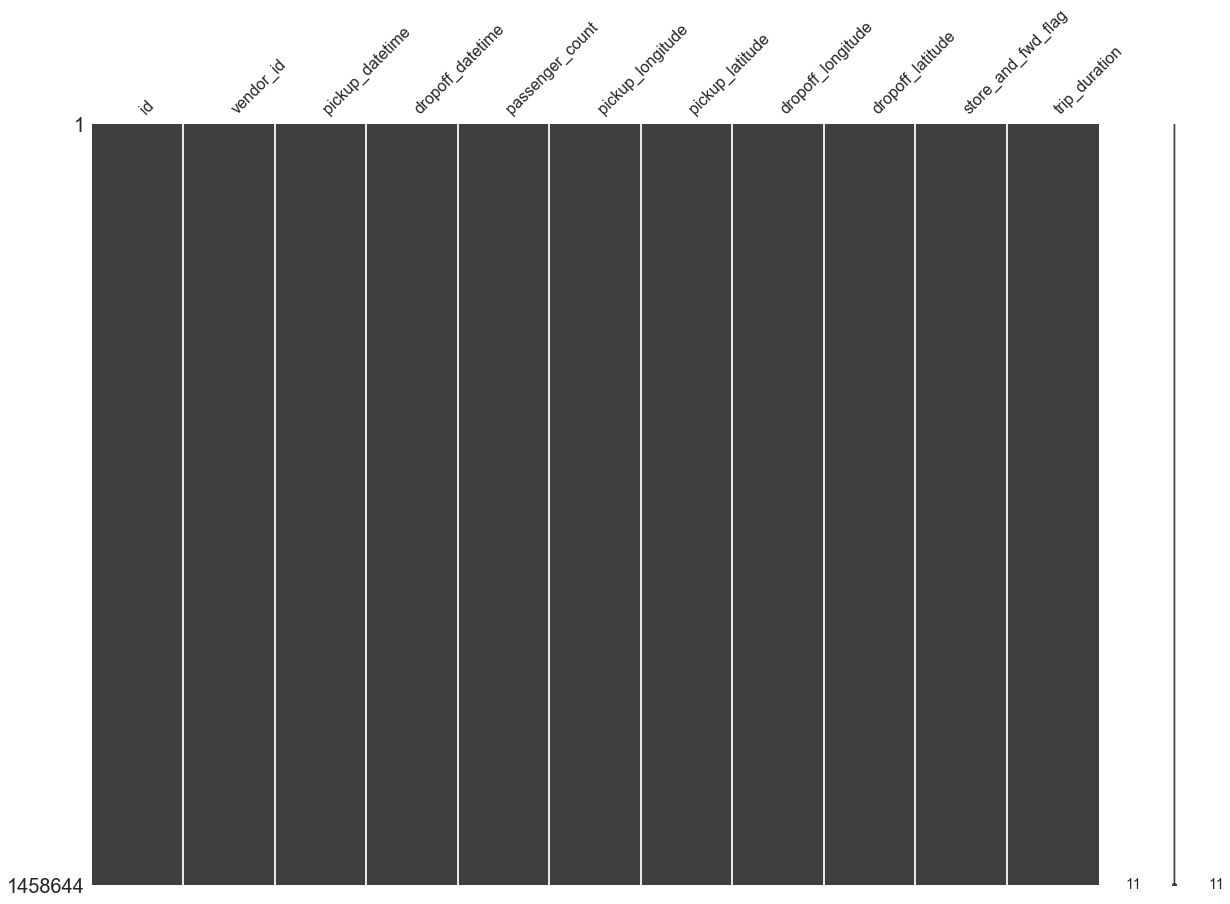

In [21]:
msno.matrix(df = train, figsize = (20, 14))

#### 데이터에 결측치는 없다